# k-Means - NumPy Implementation

The k-means algorithm is an unsupervised clustering algorithm. It finds **k** clusters in your data based on a distance function minimization.

The goals of this tutorial are:
 - Illustrate an unsupervised classification problem.
 - Explain how the k-means work.
 - Show how easy it is to implement the k-means algorithm in python.

This tutorial is interactive and it corresponds to  section 9.1 of the book: **Christopher M. Bishop. 2006. Pattern Recognition and Machine Learning (Information Science and Statistics). Springer-Verlag New York, Inc., Secaucus, NJ, USA.**

## k-Means Algorithm

The k-means algorithm deals with the problem of identifying groups, or clusters, of data points in a multidimensional space. Suppose we have a data set ${x_1,x_2,...,x_N}$ consisting of N observations of a random M-dimensional Euclidean variable x. Our goal is to partition the data set into some number K of clusters, where we shall suppose for the moment that the value of K is given. Intuitively, we might think of a cluster as
comprising a group of data points whose inter-point distances are small compared with the distances to points outside of the cluster. We can formalize this notion by first introducing a set of D-dimensional vectors $μ_k$, where $k = 1,...,K$, in which $μ_k$ is a prototype associated with the kth cluster. As we shall see shortly, we can think of the $μ_k$ as representing the centres of the clusters. Our goal is then to find
an assignment of data points to clusters, as well as a set of vectors ${μ_k}$, such that the sum of the squares of the distances of each data point to its closest vector $μ_k$, is a minimum. It is convenient at this point to define some notation to describe the assignment of data points to clusters. For each data point $x_n$, we introduce a corresponding set
of binary indicator variables $r_{nk} ∈ {0, 1}$, where $k = 1,...,K$ describing which of the K clusters the data point xn is assigned to, so that if data point $x_n$ is assigned to cluster k then $r_{nk} = 1$, and $r_{nj} = 0$ for $j=k$. This is known as the 1-of-K coding
scheme. We can then define an objective function, sometimes called a distortion measure, given by:

$$J = \sum_{n=1}^{N}\sum_{k=1}^{K} r_{nk}||x_n - \mu_k||^2$$

which represents the sum of the squares of the distances of each data point to its assigned vector $μ_k$. Our goal is to find values for the $r_{nk}$ and the $μ_k$ so as to minimize J. We can do this through an iterative procedure in which each iteration involves two successive steps corresponding to successive optimizations with respect to the $r_{nk}$ and the $μ_k$. First we choose some initial values for the $μ_k$. Then in the first phase we minimize J with respect to the $r_nk$, keeping the $μ_k$ fixed. In the second phase we minimize J with respect to the $μ_k$, keeping $r_{nk} fixed. This two-stage optimization is then repeated until convergence. J is a linear function of $r_{nk}, this optimization can be performed easily to give a closed form solution. The terms involving different n are independent and so we can optimize for each n separately by choosing $r_{nk}$ to be 1 for whichever value of k gives the minimum
value of $||x_n - \mu_k||^2$. In other words, we simply assign the nth data point to the closest cluster centre. More formally, this can be expressed as:

$$r_{nk} =  \begin{cases} 
               1 & if \quad k = argmin_j ||x_n - \mu_k||^2 \\
               0 & Otherwise \\
   \end{cases}$$


Now consider the optimization of the $μ_k$ with the $r_nk$ held fixed. The objective function J is a quadratic function of $μ_k$, and it can be minimized by setting its derivative with respect to $μ_k$ to zero giving:

$$ 2\sum_{n=1}^ {N}r_{nk}(x+n-\mu_k) = 0$$

which we can solve for $\mu_k$:

$$\mu_k = \frac{\sum_n r_{nk}x_n}{\sum_n r_{nk}}$$

The denominator in this expression is equal to the number of points assigned to cluster k, and so this result has a simple interpretation, namely set $μ_k$ equal to the mean of all of the data points xn assigned to cluster k. For this reason, the procedure is known as the K-means algorithm. The two phases of re-assigning data points to clusters and re-computing the cluster means are repeated in turn until there is no further change in the assignments (or until some maximum number of iterations is exceeded). Because each phase reduces the value of the objective function J, convergence of the algorithm is assured. However, it may converge to a local rather than global minimum of J.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib 
import matplotlib.pylab as plt
import sklearn # Traditional machine learning library
from scipy.spatial.distance import cdist # functiom for computing pairwise distance


Bad key "ckend" on line 1 in
/Users/robertosouza/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


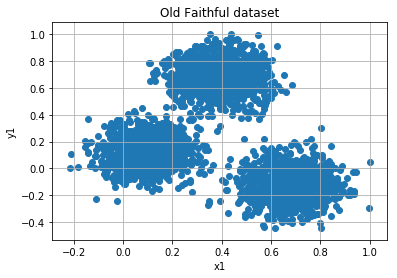

(3000, 2)


In [2]:
data = np.loadtxt("./Data/xclara.csv",delimiter = ',',skiprows=1)
#data = data[:,1:]
data = data/data.max(axis = 0)

plt.figure()
plt.scatter(data[:,0],data[:,1])
plt.grid()
plt.title("Old Faithful dataset")
plt.xlabel("x1")
plt.ylabel("y1")
plt.show()
print data.shape

In [3]:
def kmeans(data,centroids,niterations = 10):
    k = centroids.shape[0] # Number of clusters
    N = data.shape[0]
    indexes = np.arange(N,dtype = int)
    J = np.zeros(niterations) # Store the cost function values
    for ii in xrange(niterations):
        centroids_previous = centroids.copy()
        distance_vector = cdist(data,centroids,'euclidean') # Distances
        labels = distance_vector.argmin(axis = 1) # Assign labels
        J[ii]= (distance_vector[indexes,labels]**2).sum()
        # Compute cost function and update centroids
        for jj in xrange(k):
            centroids[jj,:] = data[(labels ==jj),:].mean(axis = 0)
    return J/N,centroids,centroids_previous,labels     

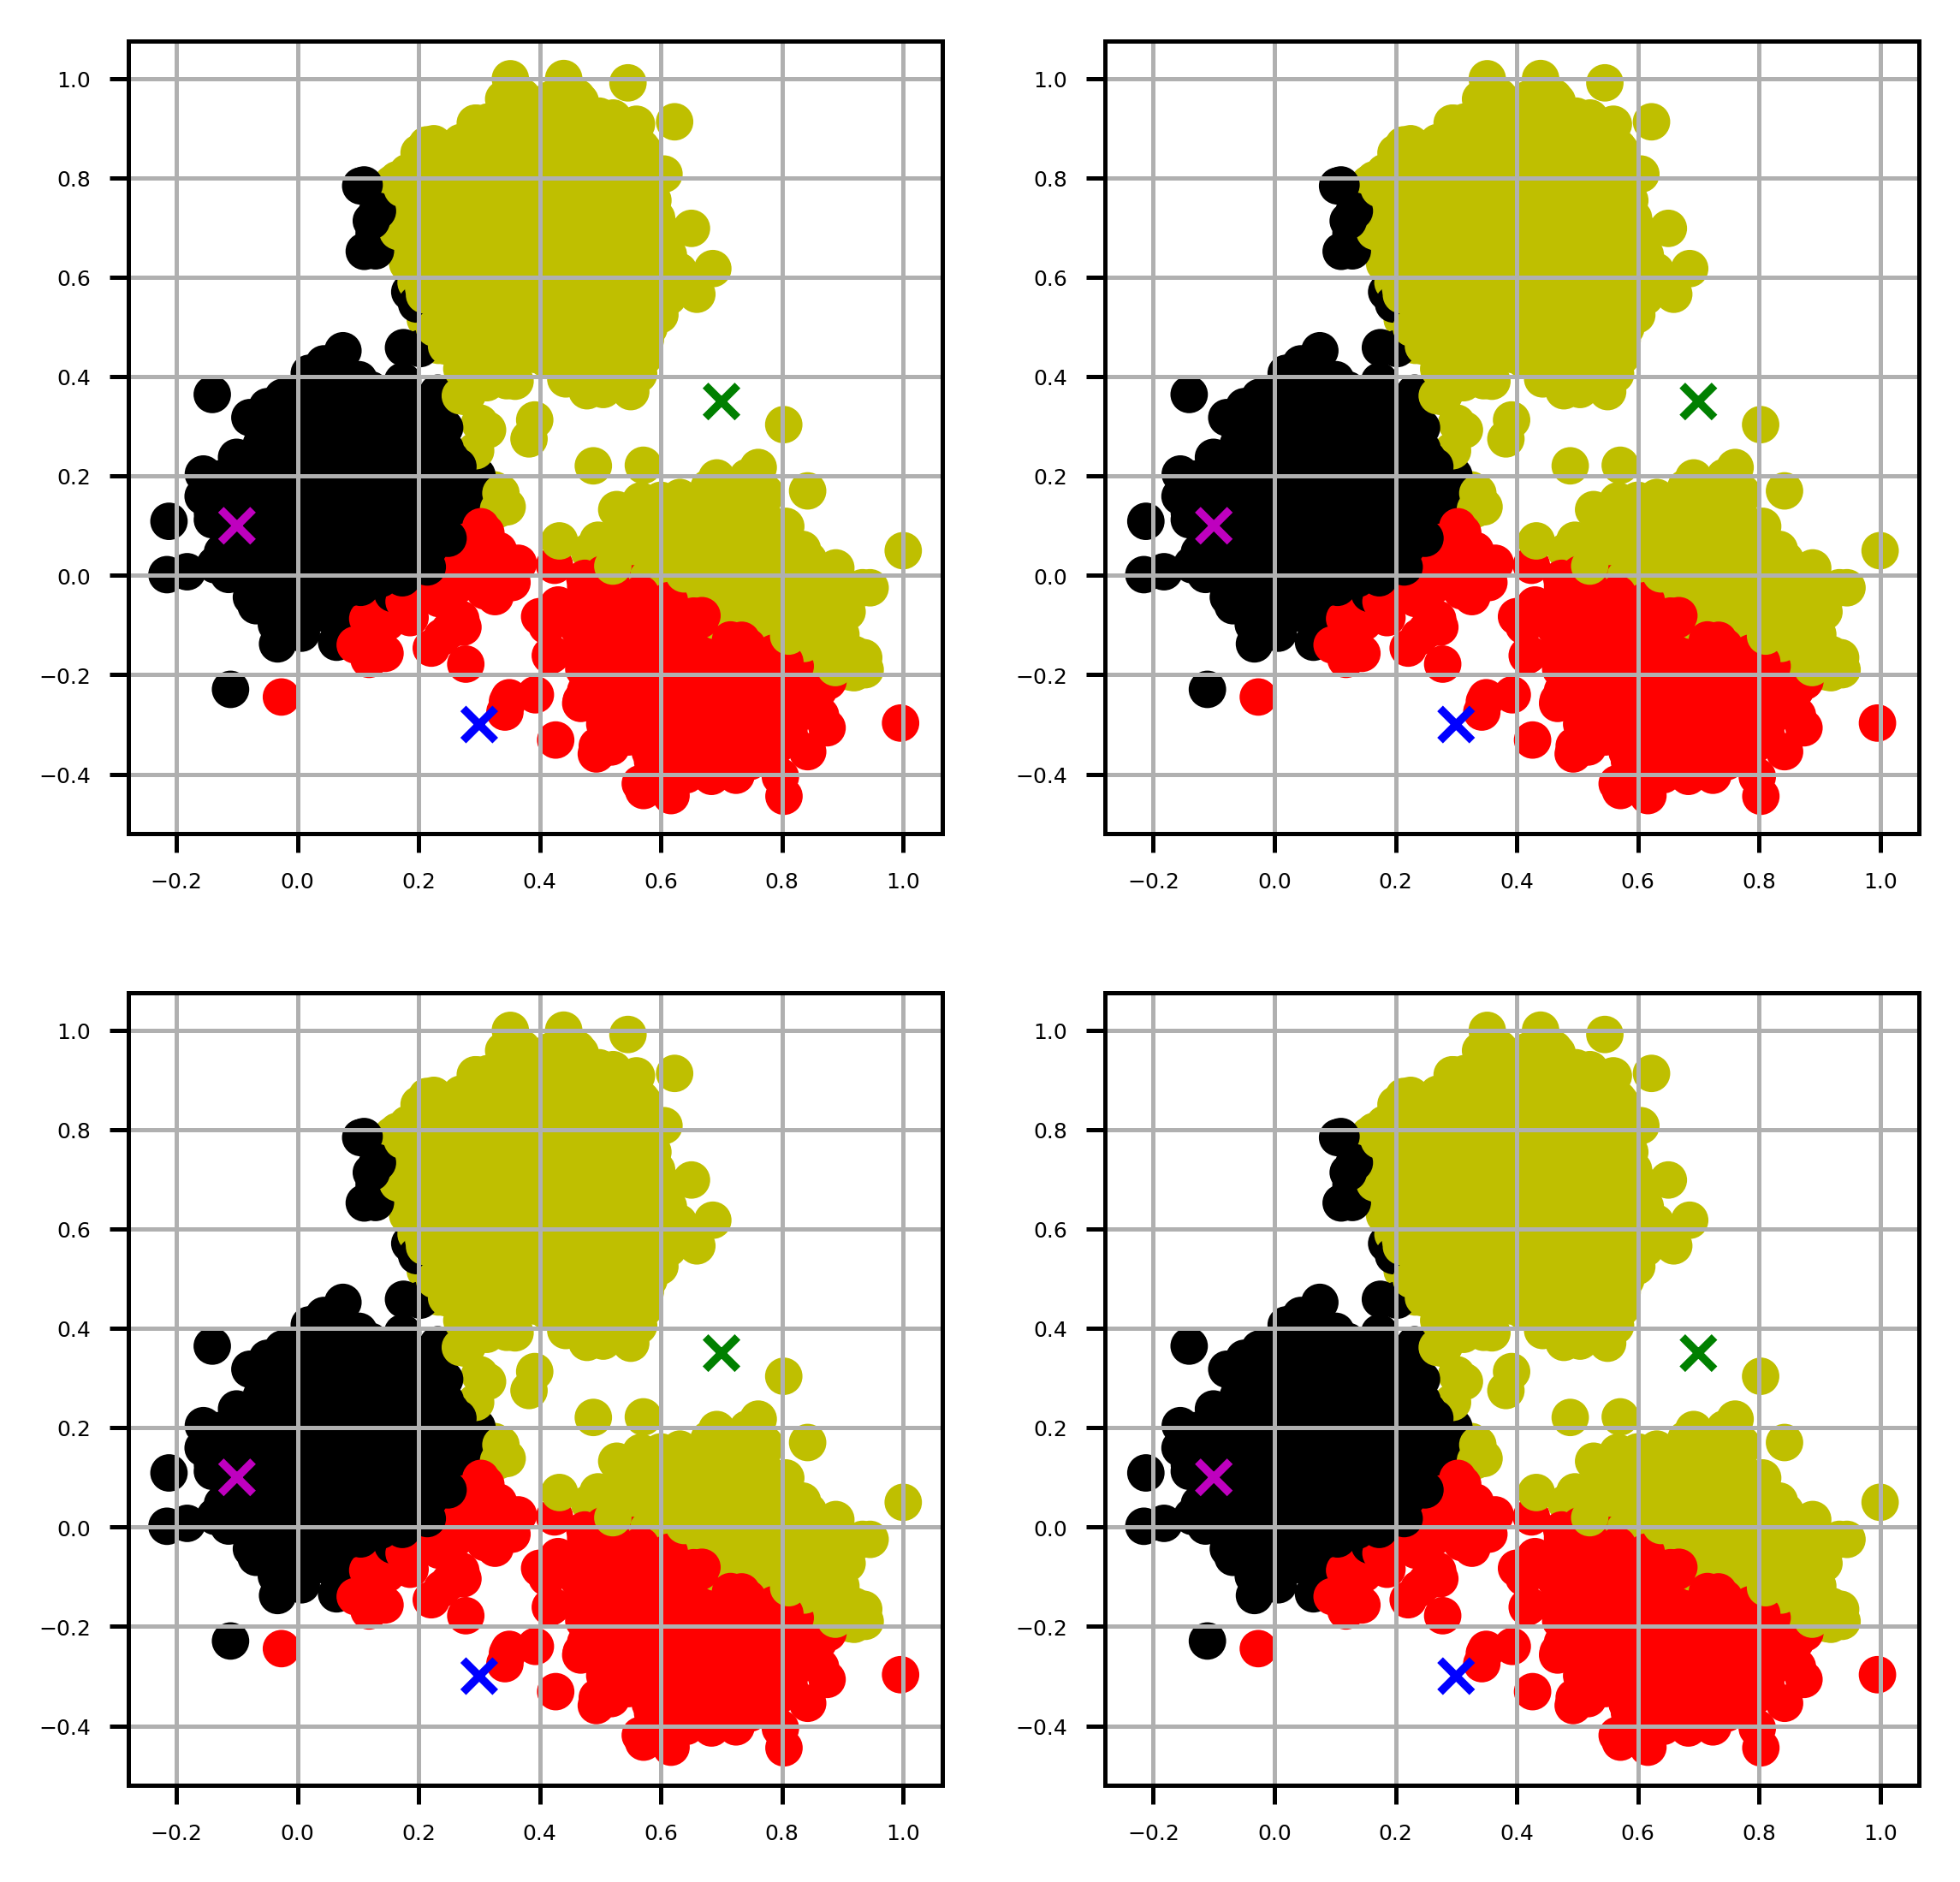

In [4]:
matplotlib.rc('xtick', labelsize=4) 
matplotlib.rc('ytick', labelsize=4) 

# Initial centroids
centroids = np.array([[0.3,-0.3],[0.7,0.35],[-0.1,0.1]])

# Colors for the plot markers
colors = np.array(['r','y','k'])
colors2 = np.array(['b','g','m'])


fig, ax = plt.subplots(nrows=2, ncols=2,figsize = (6,6), dpi = 450)
counter = 0
for row in ax:
    for col in row:
        J,_,centroids_previous,labels = \
        kmeans(data,centroids.copy(),niterations = 1)    
        #Displaying the dataset
        col.scatter(data[:,0],data[:,1],c=colors[labels])
        col.scatter(centroids_previous[:,0],centroids_previous[:,1]\
                    ,marker = 'x',c=colors2)
        col.grid()
        counter+=5
plt.show()

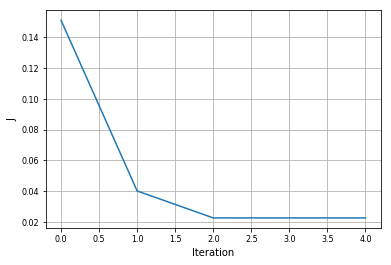

In [5]:
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 
J,_,_,_ = kmeans(data,centroids,niterations = 5)
plt.figure()
plt.plot(J)
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("J")
plt.show()